## Feature Selection_Prophet
## Table of Contents:
* [0. Importing dependencies](#dependencies)
* [1. Feature extraction by Prophet](#1.0)



  


# 0. Importing dependencies  <a class="anchor" id="dependencies"></a>

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)
!pip install prophet
from prophet import Prophet
! pip install --upgrade holidays
from prophet.plot import plot_components
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

Mounted at /content/gdrive/


In [ ]:
# Load dataframes
file_path = '/content/gdrive/My Drive/df_merged_m_kanal_D.csv'
df_merged_m = pd.read_csv(file_path)

# 1. Feature extraction by Prophet  <a class="anchor" id="1.0"></a>

In [ ]:
# Fit model for videoConsumption
model_vc = Prophet()
model_vc.add_country_holidays(country_name='TR')

# model_vc.add_seasonality(name='weekly', period=10080, fourier_order=5)  # Weekly seasonality
# model_vc.add_seasonality(name='monthly', period=43920, fourier_order=3)  # Monthly seasonality
# model_vc.add_seasonality(name='yearly', period=525960, fourier_order=2) # Yearly seasonality

model_vc.add_regressor('impression')
# model_vc.add_regressor('uniqueDevice')

model_vc.fit(df_merged_m[['datetime', 'videoConsumption', 'impression']].rename(columns={'videoConsumption': 'y', 'datetime': 'ds'}))

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_of3mtji/2dedrzxt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_of3mtji/7mjlsc9j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25458', 'data', 'file=/tmp/tmp_of3mtji/2dedrzxt.json', 'init=/tmp/tmp_of3mtji/7mjlsc9j.json', 'output', 'file=/tmp/tmp_of3mtji/prophet_modelxi0yztvs/prophet_model-20240616194709.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:47:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:52:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Fit model for impression
model_i = Prophet()
model_i.add_country_holidays(country_name='TR')

# model_i.add_seasonality(name='weekly', period=10080, fourier_order=5)  # Weekly seasonality
# model_i.add_seasonality(name='monthly', period=43920, fourier_order=3)  # Monthly seasonality
# model_i.add_seasonality(name='yearly', period=525960, fourier_order=2) # Yearly seasonality

model_i.add_regressor('videoConsumption')
# model_i.add_regressor('uniqueDevice')
model_i.fit(df_merged_m[['datetime', 'impression', 'videoConsumption']].rename(columns={'impression': 'y', 'datetime': 'ds'}))

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_of3mtji/7q4hmztu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_of3mtji/8ptrguyh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83248', 'data', 'file=/tmp/tmp_of3mtji/7q4hmztu.json', 'init=/tmp/tmp_of3mtji/8ptrguyh.json', 'output', 'file=/tmp/tmp_of3mtji/prophet_modelgfjqwmv2/prophet_model-20240616195257.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:52:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:57:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Fit model for uniqueDevice
model_ud = Prophet()
model_ud.add_country_holidays(country_name='TR')

# model_ud.add_seasonality(name='weekly', period=10080, fourier_order=5)  # Weekly seasonality
# model_ud.add_seasonality(name='monthly', period=43920, fourier_order=3)  # Monthly seasonality
# model_ud.add_seasonality(name='yearly', period=525960, fourier_order=2) # Yearly seasonality

model_ud.fit(df_merged_m[['datetime', 'uniqueDevice']].rename(columns={'uniqueDevice': 'y', 'datetime': 'ds'}))

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_of3mtji/johdr9iv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_of3mtji/c_6ye051.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29140', 'data', 'file=/tmp/tmp_of3mtji/johdr9iv.json', 'init=/tmp/tmp_of3mtji/c_6ye051.json', 'output', 'file=/tmp/tmp_of3mtji/prophet_modeldq48yuji/prophet_model-20240616195737.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:57:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:06:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Meke predictions

# Prediction for videoConsumption
future_vc = df_merged_m[['datetime', 'impression', 'uniqueDevice']].copy()
future_vc.rename(columns={'datetime': 'ds'}, inplace=True)

forecast_vc = model_vc.predict(future_vc)

In [ ]:
# Prediction for impression
future_i = df_merged_m[['datetime', 'videoConsumption', 'uniqueDevice']].copy()
future_i.rename(columns={'datetime': 'ds'}, inplace=True)

forecast_i = model_i.predict(future_i)

In [ ]:
# Prediction for uniqueDevice
future_ud = df_merged_m[['datetime', 'uniqueDevice']].copy()
future_ud.rename(columns={'datetime': 'ds'}, inplace=True)

forecast_ud = model_ud.predict(future_ud)

In [ ]:
# Merge features
features = forecast_vc[['ds', 'trend', 'weekly']].merge(
    forecast_i[['ds', 'trend', 'weekly']], on='ds', suffixes=('_vc', '_i'))

features = features.merge(
    forecast_ud[['ds', 'trend', 'weekly']], on='ds', suffixes=('', '_ud')
).rename(columns={
    'trend': 'trend_ud',
    'weekly': 'weekly_ud'
})

features.rename(columns={'ds': 'datetime'}, inplace=True)

print(features.head())

             datetime      trend_vc     weekly_vc      trend_i    weekly_i  \
0 2023-01-01 00:00:00  50364.618053 -15653.123963  3316.896094  212.242844   
1 2023-01-01 00:01:00  50364.508076 -15636.965839  3316.871245  212.433490   
2 2023-01-01 00:02:00  50364.398099 -15620.785900  3316.846395  212.623950   
3 2023-01-01 00:03:00  50364.288122 -15604.584196  3316.821546  212.814223   
4 2023-01-01 00:04:00  50364.178145 -15588.360776  3316.796696  213.004310   

       trend_ud     weekly_ud  
0  1.276424e+06  19888.442737  
1  1.276407e+06  19945.771394  
2  1.276390e+06  20003.073466  
3  1.276372e+06  20060.348850  
4  1.276355e+06  20117.597444  


In [ ]:
# Save extracted features
path_to_save = '/content/gdrive/My Drive/extracted_features_kanal_D.csv'
features.to_csv(path_to_save, index=False)

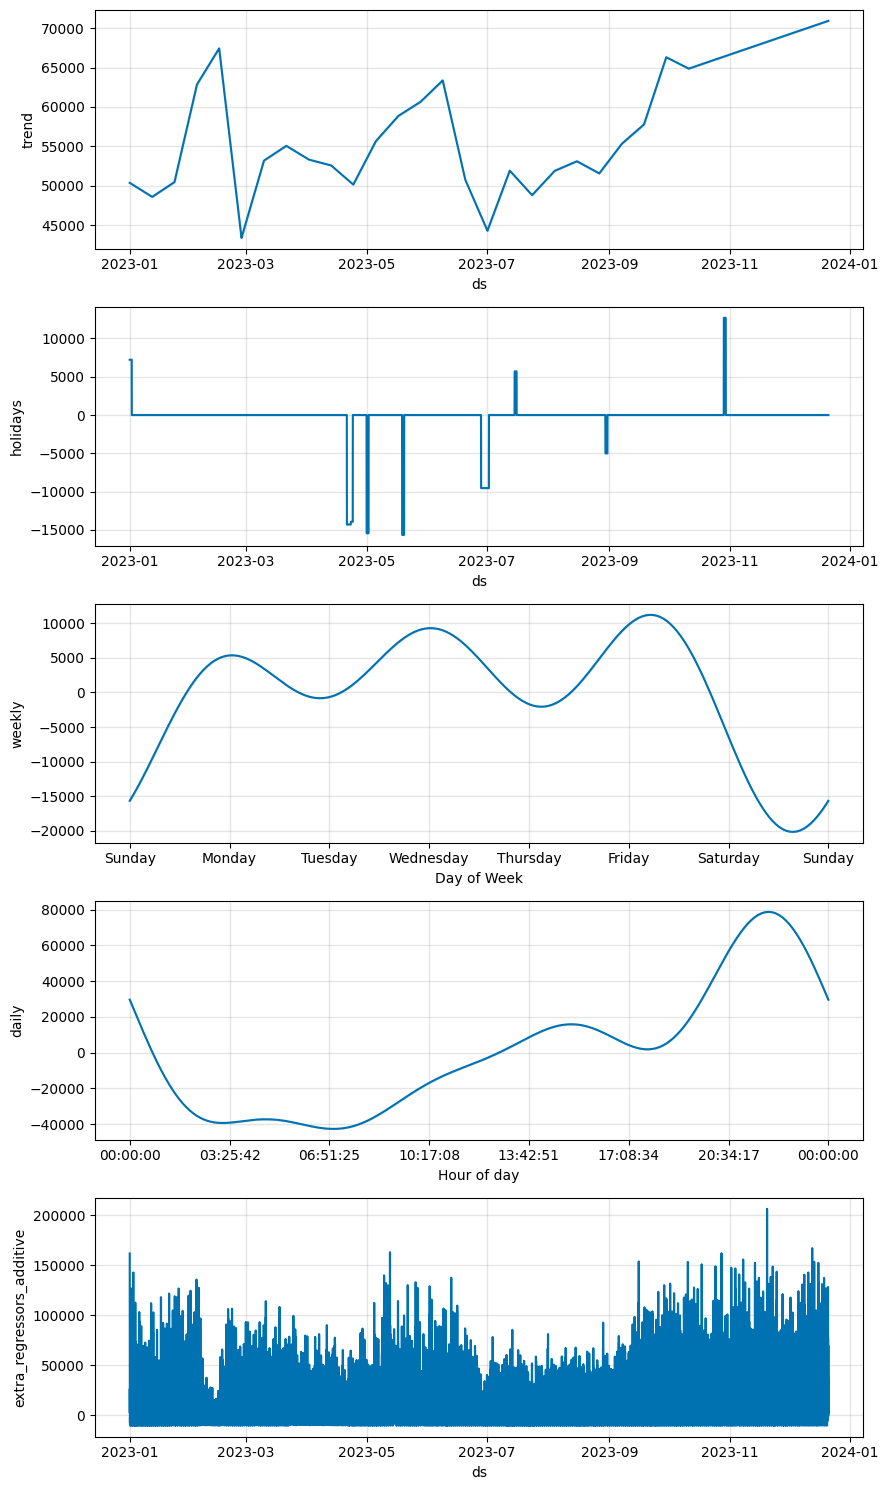

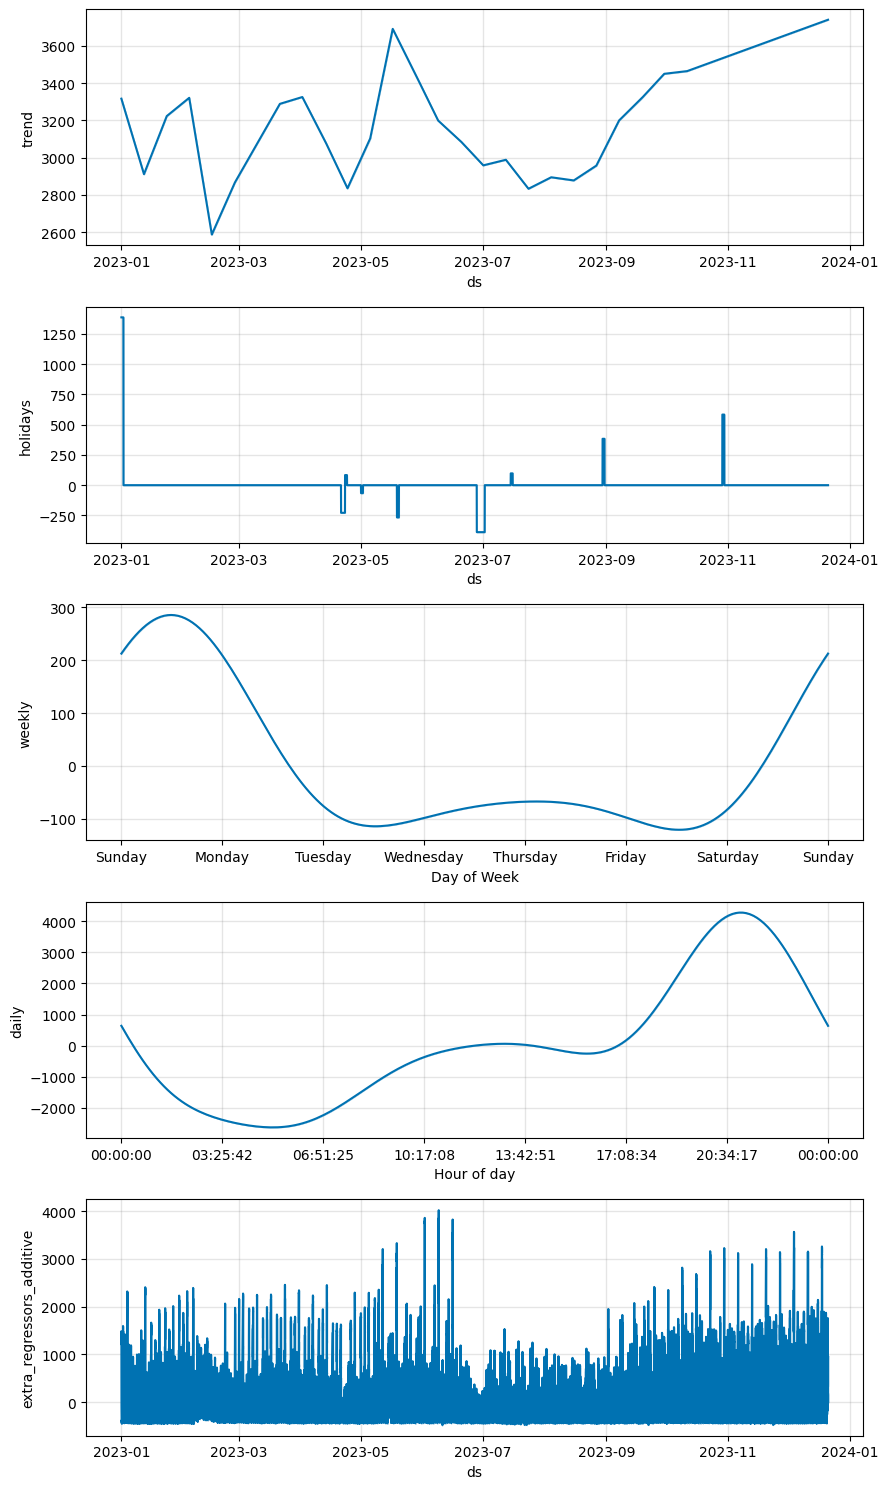

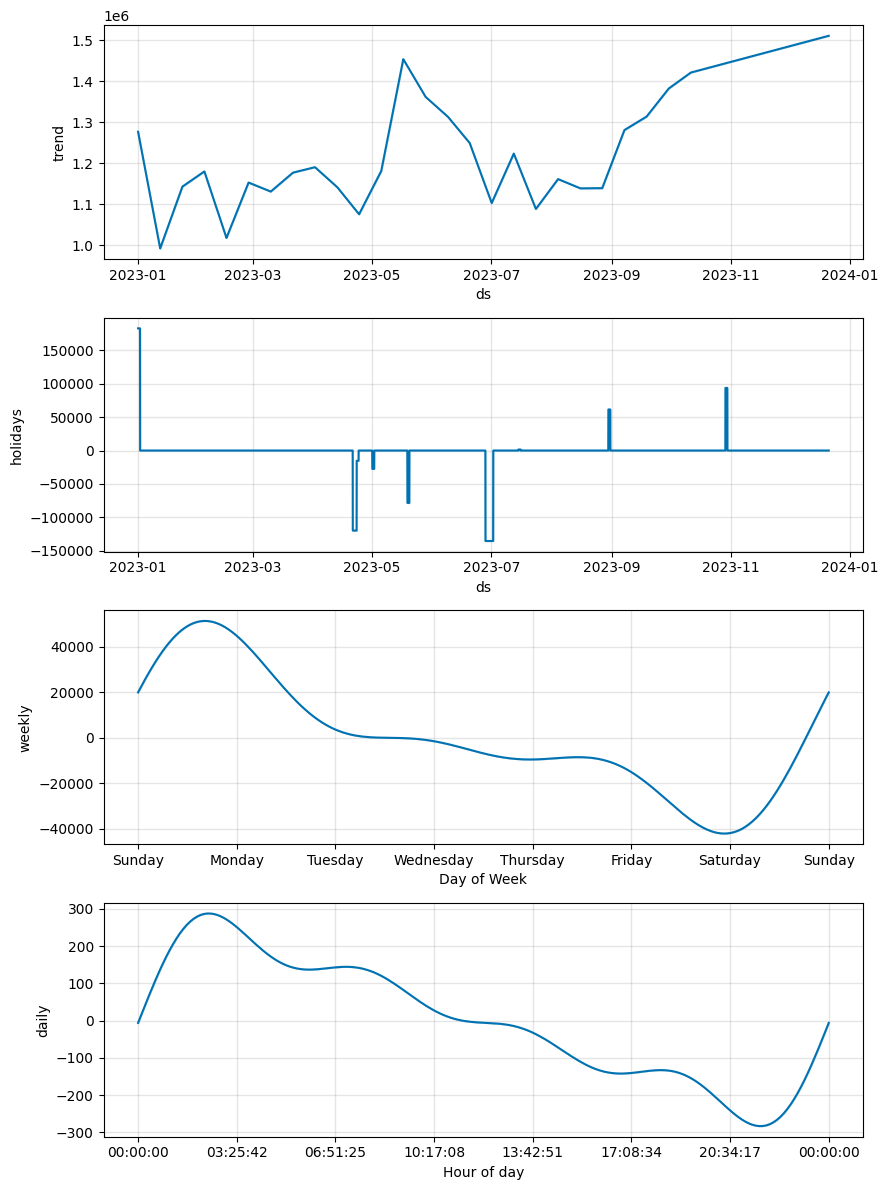

In [ ]:
# Plot feature components for videoConsumption
fig_vc = plot_components(model_vc, forecast_vc)
plt.show()

# Plot feature components for impression
fig_i = plot_components(model_i, forecast_i)
plt.show()

# Plot feature components for uniqueDevice
fig_ud = plot_components(model_ud, forecast_ud)
plt.show()


In [ ]:
# Merge target variables with extracted features

# Load features
file_path = '/content/gdrive/My Drive/extracted_features_kanal_D.csv'
df_features = pd.read_csv(file_path)

# Merge with df_merged_m
df_features.set_index('datetime', inplace=True)
df_merged_m.set_index('datetime', inplace=True)
df_final = df_features.join(df_merged_m[['videoConsumption', 'impression']], how='left')

df_final.head()

,trend_vc,weekly_vc,trend_i,weekly_i,trend_ud,weekly_ud,videoConsumption,impression
datetime,,,,,,,,
2023-01-01 00:00:00,50364.618053,-15653.123963,3316.896094,212.242844,1.276424e+06,19888.442737,202407,53151
2023-01-01 00:01:00,50364.508076,-15636.965839,3316.871245,212.433490,1.276407e+06,19945.771394,190207,41012
2023-01-01 00:02:00,50364.398099,-15620.785900,3316.846395,212.623950,1.276390e+06,20003.073466,187252,27991
2023-01-01 00:03:00,50364.288122,-15604.584196,3316.821546,212.814223,1.276372e+06,20060.348850,199913,23316
2023-01-01 00:04:00,50364.178145,-15588.360776,3316.796696,213.004310,1.276355e+06,20117.597444,205915,18712


In [ ]:
print(df_final.isnull().sum())

trend_vc            0
weekly_vc           0
trend_i             0
weekly_i            0
trend_ud            0
weekly_ud           0
videoConsumption    0
impression          0
dtype: int64


In [ ]:
# Save the final dataframe
path_to_save = '/content/gdrive/My Drive/df_final_kanal_D.csv'
df_final.to_csv(path_to_save, index=False)